In [14]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [15]:
df=pd.read_excel("Documents/Topgear/Stats.xlsx")
df.head()

,Emp#,YearsOfExp,Salary in Rs.
0,1,10,126015
1,2,1,12598
2,3,8,100639
3,4,10,125351
4,5,2,25031


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 3 columns):
Emp#             25 non-null int64
YearsOfExp       25 non-null int64
Salary in Rs.    25 non-null int64
dtypes: int64(3)
memory usage: 680.0 bytes


Applied Statistics

In [17]:
means=np.mean(df,axis=0)
print("Means of 3 columns are:\n",means)

Means of 3 columns are:
 Emp#                13.0
YearsOfExp           6.2
Salary in Rs.    77821.2
dtype: float64


In [18]:
mode=stats.mode(df,axis=0)
print("Modes of 3 columns are:\n",mode)

Modes of 3 columns are:
 ModeResult(mode=array([[     1,     10, 100639]], dtype=int64), count=array([[1, 5, 2]]))


In [19]:
median=np.median(df,axis=0)
print("Medians of 3 columns are:\n",median)

Medians of 3 columns are:
 [1.3000e+01 7.0000e+00 8.7654e+04]


In [20]:
standard_deviation=np.std(df,axis=0)
print("Standard Deviation of 3 columns are:\n",standard_deviation)

Standard Deviation of 3 columns are:
 Emp#                 7.211103
YearsOfExp           3.111270
Salary in Rs.    39042.529962
dtype: float64


In [21]:
variance=np.var(df,axis=0)
print("Variance of 3 columns are:\n",variance)

Variance of 3 columns are:
 Emp#             5.200000e+01
YearsOfExp       9.680000e+00
Salary in Rs.    1.524319e+09
dtype: float64


###Natural Language processing

In [23]:
df=pd.read_csv("Documents/Topgear/data_in.csv")
df.head()

,Comment
0,"""Hello there, how are you? Weather is awesome...."
1,"""Hello Mr. Raja, how are you? Weather is aweso..."
2,"""Hello Mr. Raja, how are you. Weather is bad. ..."
3,"""NLP is great technique. It is nice to learn t..."
4,"""AI is making difference in this world now. I..."


In [80]:
###Write a python script that reads the data_in.csv from every cell in column
#labeled as comment and perform sentence tokenization and redirects in to
#column of data_out.csv. Perform the NE Chunking on these sentences.
import csv
from nltk.tokenize import sent_tokenize
list1=[]
for i in df["Comment"]:
    tokenized_text=sent_tokenize(i)
    tokenized_text
    list1.append(tokenized_text)
with open("data_out.csv","w") as g:
    writer=csv.writer(g)
    for val in list1:
        writer.writerow([val])

In [83]:
df1=pd.read_csv("C:/Users/Ankita/data_out.csv",names=["Comment"])
df1

,Comment
0,"['""Hello there, how are you?', 'Weather is awe..."
1,"['""Hello Mr. Raja, how are you?', 'Weather is ..."
2,"['""Hello Mr. Raja, how are you.', 'Weather is ..."
3,"['""NLP is great technique.', 'It is nice to le..."
4,"['""AI is making difference in this world now.'..."


In [148]:
from nltk.tokenize import word_tokenize
list1=[]
for index in df.index:
    for elem in df.iloc[index]:
        sentence=sent_tokenize(elem)
        for x in sentence:
            words=word_tokenize(x)
            list1.append([nltk.pos_tag([i]) for i in words if i.isalpha()])
        
    
    
    

In [149]:
list2=[]
list2=[elem for i in list1 for j in i for elem in j]
print(list2,end=" ")


[('Hello', 'NN'), ('there', 'RB'), ('how', 'WRB'), ('are', 'VBP'), ('you', 'PRP'), ('Weather', 'NN'), ('is', 'VBZ'), ('awesome', 'NN'), ('Its', 'PRP$'), ('raining', 'VBG'), ('here', 'RB'), ('now', 'RB'), ('Hello', 'NN'), ('Raja', 'NN'), ('how', 'WRB'), ('are', 'VBP'), ('you', 'PRP'), ('Weather', 'NN'), ('is', 'VBZ'), ('awesome', 'NN'), ('Its', 'PRP$'), ('raining', 'VBG'), ('here', 'RB'), ('now', 'RB'), ('Hello', 'NN'), ('Raja', 'NN'), ('how', 'WRB'), ('are', 'VBP'), ('you', 'PRP'), ('Weather', 'NN'), ('is', 'VBZ'), ('bad', 'JJ'), ('Its', 'PRP$'), ('heavily', 'RB'), ('raining', 'VBG'), ('here', 'RB'), ('now', 'RB'), ('NLP', 'NN'), ('is', 'VBZ'), ('great', 'JJ'), ('technique', 'NN'), ('It', 'PRP'), ('is', 'VBZ'), ('nice', 'JJ'), ('to', 'TO'), ('learn', 'NN'), ('this', 'DT'), ('technique', 'NN'), ('AI', 'NN'), ('is', 'VBZ'), ('making', 'VBG'), ('difference', 'NN'), ('in', 'IN'), ('this', 'DT'), ('world', 'NN'), ('now', 'RB'), ('It', 'PRP'), ('would', 'MD'), ('be', 'VB'), ('helpful', 'NN')

In [153]:
##Chunking
grammar="NP:{<RB.?>*<VB.?>*<JJ>*<NNP>+<NN>?}"
cp=nltk.RegexpParser(grammar)
result=cp.parse(list2)
result.draw()

In [158]:
###Write a python script that reads the data_in.csv from every cell in column
#labeled as comment and perform word tokenization and redirects in to column of
#data_out.csv
result=[]
for index in df.index:
    for i in df.loc[index]:
        words=word_tokenize(i)
        result.append(words)
with open("data_out.csv","w") as g:
    writer=csv.writer(g)
    for val in result:
        writer.writerow([val])
        

In [163]:
df1=pd.read_csv("C:/Users/Ankita/data_out.csv",names=["Tokenized Words"])
df1.head()

,Tokenized Words
0,"['``', 'Hello', 'there', ',', 'how', 'are', 'y..."
1,"['``', 'Hello', 'Mr.', 'Raja', ',', 'how', 'ar..."
2,"['``', 'Hello', 'Mr.', 'Raja', ',', 'how', 'ar..."
3,"['``', 'NLP', 'is', 'great', 'technique', '.',..."
4,"['``', 'AI', 'is', 'making', 'difference', 'in..."


In [166]:
###From an input file data.txt it is required to identify the POS-Tagging and
#display it on tree structure.
nltk.download("state_union")
from nltk.corpus import state_union
from nltk.tokenize import PunktSentenceTokenizer

[nltk_data] Downloading package state_union to
[nltk_data]     C:\Users\Ankita\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\state_union.zip.


In [176]:
data=state_union.raw("C:/Users/Ankita/Documents/Topgear/data.txt")
model=PunktSentenceTokenizer()
tokenized=model.tokenize(data)
print(tokenized,end="/n")


['Hello there, how are you?', 'Weather is awesome.', 'Its raining here now.', 'Hello Mr.', 'Raja, how are you?', 'Weather is awesome.', 'Its raining here now.', 'Hello Mr.', 'Raja, how are you.', 'Weather is bad.', 'Its heavily raining here now.', 'NLP is great technique.', 'It is nice to learn this technique.', 'AI is making difference in this world now.', 'It would be helpful for betterment of human life.', 'We need to make advantage of that.']/n

In [182]:
def process_content(tokenized):
    try:
        for i in tokenized:
            words=nltk.word_tokenize(i)
            tagged=nltk.pos_tag(words)
            print(tagged)
    except Exception as e:
        print(str(e))
        

In [210]:
process_content(tokenized)

[('Hello', 'NNP'), ('there', 'RB'), (',', ','), ('how', 'WRB'), ('are', 'VBP'), ('you', 'PRP'), ('?', '.')]
[('Weather', 'NNP'), ('is', 'VBZ'), ('awesome', 'JJ'), ('.', '.')]
[('Its', 'PRP$'), ('raining', 'VBG'), ('here', 'RB'), ('now', 'RB'), ('.', '.')]
[('Hello', 'NNP'), ('Mr', 'NNP'), ('.', '.')]
[('Raja', 'NNP'), (',', ','), ('how', 'WRB'), ('are', 'VBP'), ('you', 'PRP'), ('?', '.')]
[('Weather', 'NNP'), ('is', 'VBZ'), ('awesome', 'JJ'), ('.', '.')]
[('Its', 'PRP$'), ('raining', 'VBG'), ('here', 'RB'), ('now', 'RB'), ('.', '.')]
[('Hello', 'NNP'), ('Mr', 'NNP'), ('.', '.')]
[('Raja', 'NNP'), (',', ','), ('how', 'WRB'), ('are', 'VBP'), ('you', 'PRP'), ('.', '.')]
[('Weather', 'NNP'), ('is', 'VBZ'), ('bad', 'JJ'), ('.', '.')]
[('Its', 'PRP$'), ('heavily', 'RB'), ('raining', 'VBG'), ('here', 'RB'), ('now', 'RB'), ('.', '.')]
[('NLP', 'NNP'), ('is', 'VBZ'), ('great', 'JJ'), ('technique', 'NN'), ('.', '.')]
[('It', 'PRP'), ('is', 'VBZ'), ('nice', 'JJ'), ('to', 'TO'), ('learn', 'VB'), (

In [202]:
##For a given text file exclude the stop words and perform the Stemming &
#lemmatization and compare the results.


from nltk.corpus import stopwords
stop_words=set(stopwords.words("english"))
print(stop_words,end=" ")

{'theirs', "she's", 'your', 'into', 'haven', "wasn't", 'was', 'hadn', 're', "needn't", 'yours', "you'd", 'about', 'y', 'having', 'that', 'did', 't', 'am', 'we', "don't", 'o', 'own', 'ma', "won't", 'himself', 'too', 'each', 'or', 'won', 'under', "shan't", 'have', 'mustn', 'isn', 'against', 'mightn', 'before', 's', 'until', "doesn't", 'has', 'her', 'wasn', "weren't", 'who', 'again', 'off', 'as', 'because', 'ain', 'down', 'herself', 'be', 'weren', "hadn't", 'couldn', 'very', 'me', 'than', 'just', 'been', 'up', 'over', 'here', 'out', "wouldn't", 'yourself', 'shan', 'where', 'you', 'is', 'do', 'when', "should've", 'ours', 'will', "hasn't", 'them', "it's", 'only', 'm', 'd', 'its', 'same', "couldn't", 'should', 'doesn', 'whom', 'him', 'there', 'hers', 'a', 'above', 'an', "you're", 'those', 'any', 'during', 'itself', 'by', 'wouldn', 'my', 'doing', 'our', 'they', 'below', 'themselves', 'which', 'while', 'between', 'few', 'can', 'then', 'll', 'how', 'in', 'didn', 'to', "mightn't", 'being', 'nor'

In [212]:
l1=[]
for sentence in tokenized:
    words=word_tokenize(sentence)
    for elem in words:
        elem=elem.lower()
        if elem not in stop_words and elem.isalpha():
            l1.append(elem)
print(l1,end=" ")

        

['hello', 'weather', 'awesome', 'raining', 'hello', 'mr', 'raja', 'weather', 'awesome', 'raining', 'hello', 'mr', 'raja', 'weather', 'bad', 'heavily', 'raining', 'nlp', 'great', 'technique', 'nice', 'learn', 'technique', 'ai', 'making', 'difference', 'world', 'would', 'helpful', 'betterment', 'human', 'life', 'need', 'make', 'advantage'] 

In [234]:
l2=[]
for elem in l1:
    l2.append(nltk.pos_tag([elem]))
print(l2,end=" ")



[[('hello', 'NN')], [('weather', 'NN')], [('awesome', 'NN')], [('raining', 'VBG')], [('hello', 'NN')], [('mr', 'NN')], [('raja', 'NN')], [('weather', 'NN')], [('awesome', 'NN')], [('raining', 'VBG')], [('hello', 'NN')], [('mr', 'NN')], [('raja', 'NN')], [('weather', 'NN')], [('bad', 'JJ')], [('heavily', 'RB')], [('raining', 'VBG')], [('nlp', 'NN')], [('great', 'JJ')], [('technique', 'NN')], [('nice', 'JJ')], [('learn', 'NN')], [('technique', 'NN')], [('ai', 'NN')], [('making', 'VBG')], [('difference', 'NN')], [('world', 'NN')], [('would', 'MD')], [('helpful', 'NN')], [('betterment', 'NN')], [('human', 'NN')], [('life', 'NN')], [('need', 'NN')], [('make', 'VB')], [('advantage', 'NN')]] 

In [235]:
from nltk.stem import PorterStemmer
ps=PorterStemmer()
stemmed_words=[]
for elem in l1:
    stemmed_words.append(ps.stem(elem))
print("Filtered Words:\n",l1,end=" ")
print("\n\n\nStemmed Words:\n",stemmed_words,end=" ")


Filtered Words:
 ['hello', 'weather', 'awesome', 'raining', 'hello', 'mr', 'raja', 'weather', 'awesome', 'raining', 'hello', 'mr', 'raja', 'weather', 'bad', 'heavily', 'raining', 'nlp', 'great', 'technique', 'nice', 'learn', 'technique', 'ai', 'making', 'difference', 'world', 'would', 'helpful', 'betterment', 'human', 'life', 'need', 'make', 'advantage'] 


Stemmed Words:
 ['hello', 'weather', 'awesom', 'rain', 'hello', 'mr', 'raja', 'weather', 'awesom', 'rain', 'hello', 'mr', 'raja', 'weather', 'bad', 'heavili', 'rain', 'nlp', 'great', 'techniqu', 'nice', 'learn', 'techniqu', 'ai', 'make', 'differ', 'world', 'would', 'help', 'better', 'human', 'life', 'need', 'make', 'advantag'] 

In [236]:
def get_pos_tag(tag):
    if tag.startswith("V"):
        return "v"
    elif tag.startswith("N"):
        return "n"
    elif tag.startswith("J"):
        return "a"
    elif tag.startswith("R"):
        return "r"
    else:
        return "n"

In [237]:
from nltk.stem.wordnet import WordNetLemmatizer
lem=WordNetLemmatizer()
lemmatized_words=[]
for i in range(len(l1)):
    tag=get_pos_tag(l2[i][0][1])
    if tag=="r":
        if(l1[i].endswith("ly")):
            lemmatized_words.append(l1[i].replace("ly",""))
    else:
        lemmatized_words.append(lem.lemmatize(l1[i],pos=tag))
print("Filtered Words:\n",l1,end=" ")
print("\n\n\nLemmatized Words:\n",lemmatized_words,end=" ")


Filtered Words:
 ['hello', 'weather', 'awesome', 'raining', 'hello', 'mr', 'raja', 'weather', 'awesome', 'raining', 'hello', 'mr', 'raja', 'weather', 'bad', 'heavily', 'raining', 'nlp', 'great', 'technique', 'nice', 'learn', 'technique', 'ai', 'making', 'difference', 'world', 'would', 'helpful', 'betterment', 'human', 'life', 'need', 'make', 'advantage'] 


Lemmatized Words:
 ['hello', 'weather', 'awesome', 'rain', 'hello', 'mr', 'raja', 'weather', 'awesome', 'rain', 'hello', 'mr', 'raja', 'weather', 'bad', 'heavi', 'rain', 'nlp', 'great', 'technique', 'nice', 'learn', 'technique', 'ai', 'make', 'difference', 'world', 'would', 'helpful', 'betterment', 'human', 'life', 'need', 'make', 'advantage'] 

In [1]:
###Create a small dictionary file with required set of words with weightage
#attached to it with positive and negative numbers. Create a python script that
#analyzes the given text file and classify it as negative or positive sentiment.

from nltk.corpus import state_union
data=state_union.raw("C:/Users/Ankita/Documents/Topgear/dict.txt")
print(data)


neg_words=["hate","hatred","annoyed","annoy","annoyingly","nasty"]
pos_words=["nice","excellent","good","wonderful","best","better","awesome","beautiful","beauty","beautifully","supreme"]



In [2]:
a=data.split("\r\n")
dict1={}


In [4]:
for x in data.split("\r\n"):
    temp=x.split("=")
    while("" in temp):
        temp.remove("")
    if(len(temp)>0):
        dict1[temp[0]]=temp[1]
    #print(dict(temp))
dict1
        
        

    
     
        
        
        


{'neg_words': '["hate","hatred","annoyed","annoy","annoyingly","nasty"]',
 'pos_words': '["nice","excellent","good","wonderful","best","better","awesome","beautiful","beauty","beautifully","supreme"]'}

In [13]:
import nltk
from nltk.corpus import state_union
data=state_union.raw("C:/Users/Ankita/Documents/Topgear/senti_analyze.txt")
sentence=nltk.tokenize.sent_tokenize(data)
sentence

['Rose is beautiful.',
 'Place is nasty to stay.',
 'This is the beauty of this technique.',
 'Concept is explained beautifully in this book.',
 'He annoyed me.',
 'Its the supreme place to stay.',
 'I hate this place.',
 'Dont annoy the customer.',
 'He has given nasty comments about his stay.',
 'Dessert is awesome.',
 'Your gift is wonderful.']

In [16]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid=SentimentIntensityAnalyzer()


In [22]:
for elems in sentence:
    res=sid.polarity_scores(elems)
    print(elems)
    for k in res:
        print("{}:{}".format(k,res[k]),end="")
    print()
    

Rose is beautiful.
neg:0.0neu:0.339pos:0.661compound:0.5994
Place is nasty to stay.
neg:0.474neu:0.526pos:0.0compound:-0.5574
This is the beauty of this technique.
neg:0.0neu:0.612pos:0.388compound:0.5859
Concept is explained beautifully in this book.
neg:0.0neu:0.619pos:0.381compound:0.5719
He annoyed me.
neg:0.565neu:0.435pos:0.0compound:-0.3818
Its the supreme place to stay.
neg:0.0neu:0.581pos:0.419compound:0.5574
I hate this place.
neg:0.649neu:0.351pos:0.0compound:-0.5719
Dont annoy the customer.
neg:0.0neu:0.555pos:0.445compound:0.3412
He has given nasty comments about his stay.
neg:0.34neu:0.66pos:0.0compound:-0.5574
Dessert is awesome.
neg:0.0neu:0.328pos:0.672compound:0.6249
Your gift is wonderful.
neg:0.0neu:0.233pos:0.767compound:0.765


##Machine Learning Linear Regression assignments



In [2]:
import numpy as np
import pandas as pd
url="https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"

df=pd.read_csv(url,names=["mpg: continuous","cylinders: multi-valued discrete","displacement: continuous",
                         "horsepower: continuous","weight: continuous","acceleration: continuous",
                         "model year: multi-valued discrete","origin: multi-valued discrete",
                         "car name: string (unique for each instance)"])

df2=pd.DataFrame(df["mpg: continuous"])
df2=df2["mpg: continuous"].str.split(expand=True)
df2["car name: string (unique for each instance)"]=df2[df2.columns[8:]].apply(lambda x:" ".
                                                                              join(x.dropna().astype(str)),axis=1)
df2.drop(df2.columns[[8,9,10,11,12,13]],axis=1,inplace=True)
df2.columns=["mpg: continuous","cylinders: multi-valued discrete","displacement: continuous",
                         "horsepower: continuous","weight: continuous","acceleration: continuous",
                         "model year: multi-valued discrete","origin: multi-valued discrete",
                         "car name: string (unique for each instance)"]
df2.head()


,mpg: continuous,cylinders: multi-valued discrete,displacement: continuous,horsepower: continuous,weight: continuous,acceleration: continuous,model year: multi-valued discrete,origin: multi-valued discrete,car name: string (unique for each instance)
0,18.0,8,307.0,130.0,3504.,12.0,70,1,"""chevrolet chevelle malibu"""
1,15.0,8,350.0,165.0,3693.,11.5,70,1,"""buick skylark 320"""
2,18.0,8,318.0,150.0,3436.,11.0,70,1,"""plymouth satellite"""
3,16.0,8,304.0,150.0,3433.,12.0,70,1,"""amc rebel sst"""
4,17.0,8,302.0,140.0,3449.,10.5,70,1,"""ford torino"""


In [3]:
df2.shape

(398, 9)

In [4]:
df2=df2.replace("?",np.nan)

In [5]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
mpg: continuous                                398 non-null object
cylinders: multi-valued discrete               398 non-null object
displacement: continuous                       398 non-null object
horsepower: continuous                         392 non-null object
weight: continuous                             398 non-null object
acceleration: continuous                       398 non-null object
model year: multi-valued discrete              398 non-null object
origin: multi-valued discrete                  398 non-null object
car name: string (unique for each instance)    398 non-null object
dtypes: object(9)
memory usage: 28.1+ KB


In [6]:
df2["horsepower: continuous"]=df2["horsepower: continuous"].astype(float)
df2["horsepower: continuous"]=df2["horsepower: continuous"].fillna(df2["horsepower: continuous"].mean())
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
mpg: continuous                                398 non-null object
cylinders: multi-valued discrete               398 non-null object
displacement: continuous                       398 non-null object
horsepower: continuous                         398 non-null float64
weight: continuous                             398 non-null object
acceleration: continuous                       398 non-null object
model year: multi-valued discrete              398 non-null object
origin: multi-valued discrete                  398 non-null object
car name: string (unique for each instance)    398 non-null object
dtypes: float64(1), object(8)
memory usage: 28.1+ KB


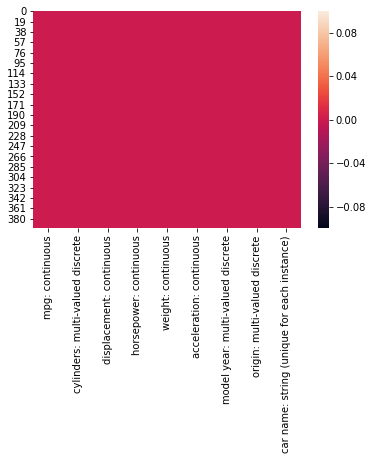

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(df2.isnull())
plt.show()

In [9]:
df2.index=df2["car name: string (unique for each instance)"]
df2.drop(columns=["car name: string (unique for each instance)"],axis=1,inplace=True)

In [10]:
df2.head()

,mpg: continuous,cylinders: multi-valued discrete,displacement: continuous,horsepower: continuous,weight: continuous,acceleration: continuous,model year: multi-valued discrete,origin: multi-valued discrete
car name: string (unique for each instance),,,,,,,,
"""chevrolet chevelle malibu""",18.0,8,307.0,130.0,3504.,12.0,70,1
"""buick skylark 320""",15.0,8,350.0,165.0,3693.,11.5,70,1
"""plymouth satellite""",18.0,8,318.0,150.0,3436.,11.0,70,1
"""amc rebel sst""",16.0,8,304.0,150.0,3433.,12.0,70,1
"""ford torino""",17.0,8,302.0,140.0,3449.,10.5,70,1


In [11]:
df2=df2.astype("float")
df2.describe()

,mpg: continuous,cylinders: multi-valued discrete,displacement: continuous,horsepower: continuous,weight: continuous,acceleration: continuous,model year: multi-valued discrete,origin: multi-valued discrete
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.199187,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,95.000000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


-0.8042028248058979

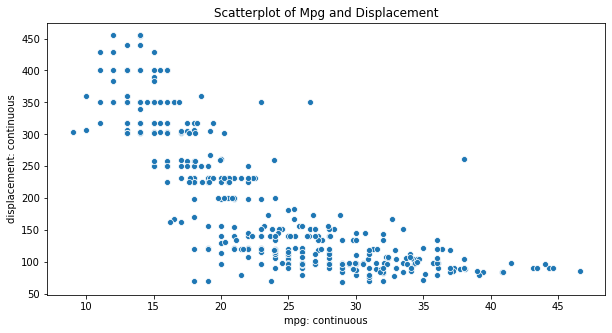

In [12]:
plt.figure(figsize=(10,5))
sns.scatterplot(df2["mpg: continuous"],df2["displacement: continuous"])
plt.title("Scatterplot of Mpg and Displacement")
np.corrcoef(df2["mpg: continuous"],df2["displacement: continuous"])[0,1]



-0.771437135002552

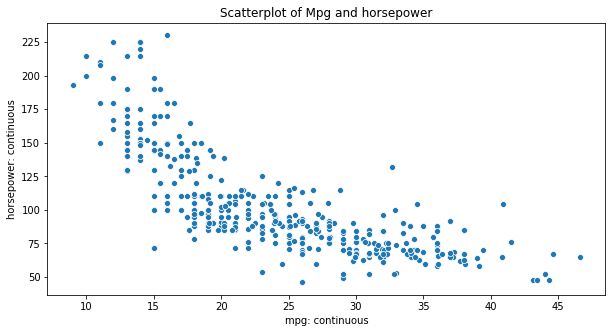

In [13]:
plt.figure(figsize=(10,5))
sns.scatterplot(df2["mpg: continuous"],df2["horsepower: continuous"])
plt.title("Scatterplot of Mpg and horsepower")
np.corrcoef(df2["mpg: continuous"],df2["horsepower: continuous"])[0,1]

-0.8317409332443351

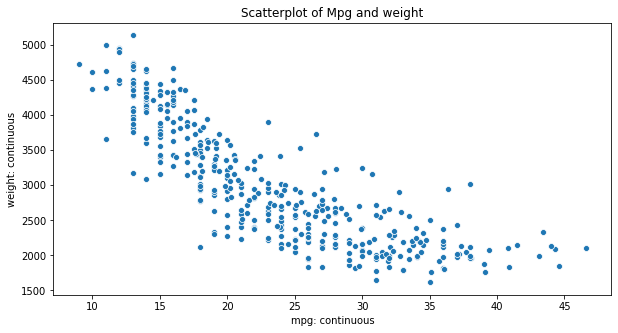

In [14]:
plt.figure(figsize=(10,5))
sns.scatterplot(df2["mpg: continuous"],df2["weight: continuous"])
plt.title("Scatterplot of Mpg and weight")
np.corrcoef(df2["mpg: continuous"],df2["weight: continuous"])[0,1]

0.42028891210165065

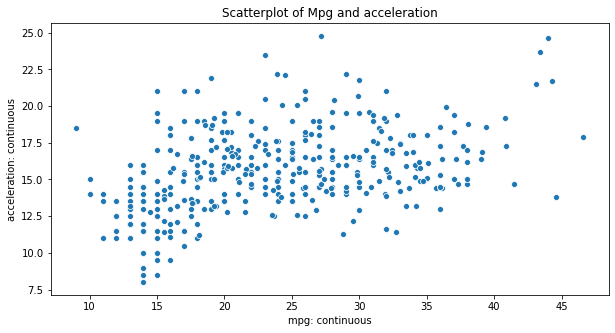

In [15]:
plt.figure(figsize=(10,5))
sns.scatterplot(df2["mpg: continuous"],df2["acceleration: continuous"])
plt.title("Scatterplot of Mpg and acceleration")
np.corrcoef(df2["mpg: continuous"],df2["acceleration: continuous"])[0,1]

-0.7753962854205543

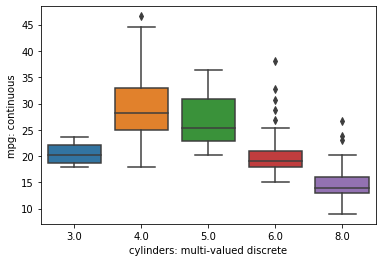

In [16]:
sns.boxplot(data=df2,x="cylinders: multi-valued discrete",y="mpg: continuous")
np.corrcoef(df2["mpg: continuous"],df2["cylinders: multi-valued discrete"])[0,1]

0.5792671330833097

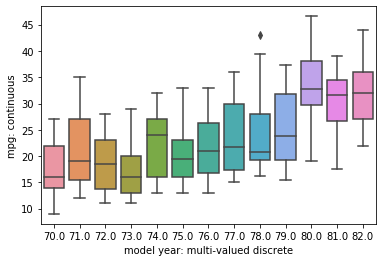

In [17]:
sns.boxplot(data=df2,x="model year: multi-valued discrete",y="mpg: continuous")
np.corrcoef(df2["mpg: continuous"],df2["model year: multi-valued discrete"])[0,1]

0.563450359773843

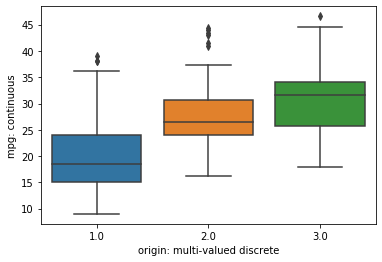

In [18]:
sns.boxplot(data=df2,x="origin: multi-valued discrete",y="mpg: continuous")
np.corrcoef(df2["mpg: continuous"],df2["origin: multi-valued discrete"])[0,1]

In [19]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
df2=sc.fit_transform(df2)
df2[0:5]

array([[-0.7064387 ,  1.49819126,  1.0906037 ,  0.66919608,  0.63086987,
        -1.29549834, -1.62742629, -0.71514478],
       [-1.09075062,  1.49819126,  1.5035143 ,  1.58659918,  0.85433297,
        -1.47703779, -1.62742629, -0.71514478],
       [-0.7064387 ,  1.49819126,  1.19623199,  1.19342642,  0.55047045,
        -1.65857724, -1.62742629, -0.71514478],
       [-0.96264665,  1.49819126,  1.06179598,  1.19342642,  0.54692342,
        -1.29549834, -1.62742629, -0.71514478],
       [-0.83454267,  1.49819126,  1.04259084,  0.93131125,  0.56584093,
        -1.84011669, -1.62742629, -0.71514478]])

In [20]:
import statsmodels.api as sm
X=df2[:,1:]#Independent
Y=df2[:,0]#Dependent
regressor_OLS=sm.OLS(endog=Y,exog=X).fit()
regressor_OLS.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.821
Model:                            OLS   Adj. R-squared (uncentered):              0.818
Method:                 Least Squares   F-statistic:                              256.0
Date:                Fri, 08 Nov 2019   Prob (F-statistic):                   9.60e-142
Time:                        22:53:44   Log-Likelihood:                         -222.49
No. Observations:                 398   AIC:                                      459.0
Df Residuals:                     391   BIC:                                      486.9
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0910      0.070     -1.300      0.194      -0.229       0.047
x2             0.2520      0.100      2.521      0.012       0.055       0.448
x3            -0.0556      0.064     -0.866      0.387      -0.182       0.071
x4            -0.7279      0.069    -10.494      0.000      -0.864      -0.592
x5             0.0362      0.034      1.069      0.286      -0.030       0.103
x6             0.3580      0.024     15.027      0.000       0.311       0.405
x7             0.1455      0.028      5.160      0.000       0.090       0.201
==============================================================================
Omnibus:                       30.551   Durbin-Watson:                   1.289
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               49.230
Skew:                           0.515   Prob(JB):                     2.04e-11
Kurtosis:                       4.381   Cond. No.                         11.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

###Univariate Regression

#As this is univariate regression,so we will consider only one independent variable 
#which is highly correlated with the dependent variable.

In [21]:
X=df2[:,4]##Independent variable-Weight
Y=df2[:,0]##Target variable-Mpg


In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)


In [23]:
print("X-Shapes:\nX_train:\tX_test:\n",X_train.shape,"\t",X_test.shape)

X-Shapes:
X_train:	X_test:
 (318,) 	 (80,)


In [24]:
print("Y-Shapes:\nY_train:\tY_test:\n",Y_train.shape,"\t",Y_test.shape)

Y-Shapes:
Y_train:	Y_test:
 (318,) 	 (80,)


In [25]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
m=len(X_train)
n=len(X_test)
X_train=X_train.reshape(m,1)
Y_train=Y_train.reshape(m,1)
X_test=X_test.reshape(n,1)
Y_test=Y_test.reshape(n,1)
model=model.fit(X_train,Y_train)
Y_pred=model.predict(X_test)
print(Y_pred)

[[-1.12397176]
 [ 0.4168531 ]
 [-1.28417094]
 [-0.00743201]
 [-0.30744138]
 [ 1.31882303]
 [ 0.96735574]
 [ 0.54695425]
 [-0.76667904]
 [ 0.23917764]
 [ 1.10328232]
 [ 0.92463596]
 [-0.04820998]
 [ 0.69647349]
 [-1.1346517 ]
 [ 1.02560999]
 [ 0.24403216]
 [ 0.2294686 ]
 [-0.62298523]
 [ 0.8168656 ]
 [-1.31426896]
 [ 0.36830789]
 [ 0.41394038]
 [ 0.03722958]
 [ 0.79744752]
 [ 0.06926942]
 [ 1.13726396]
 [ 0.559576  ]
 [ 0.56928505]
 [-0.6414324 ]
 [-0.62978155]
 [ 0.52171074]
 [-0.44725158]
 [ 0.99648286]
 [-0.43074621]
 [ 0.26150844]
 [-0.23268177]
 [-1.34825061]
 [ 1.01590094]
 [-1.92302585]
 [-1.34242518]
 [-0.70065756]
 [ 0.29257737]
 [ 0.5353034 ]
 [ 0.29743189]
 [ 0.30228641]
 [-0.11034784]
 [-1.36766869]
 [ 0.48481639]
 [ 0.97900659]
 [ 0.80327294]
 [ 0.73045513]
 [-1.28514184]
 [ 0.87997437]
 [-0.57444002]
 [-1.36378508]
 [ 0.00907336]
 [-0.08607524]
 [ 0.58384861]
 [-0.46375695]
 [-0.58511996]
 [ 0.3945223 ]
 [ 0.17703978]
 [ 0.13432   ]
 [-1.48320628]
 [-1.63660914]
 [-1.32980

In [26]:
model.score(X_test,Y_test)

0.7407718240772793

In [27]:
print("Coefficient:",model.coef_)
print("Intercept:",model.intercept_)


Coefficient: [[-0.82116861]]
Intercept: [0.00089386]


In [28]:
from sklearn.metrics import mean_squared_error,r2_score
mse=mean_squared_error(Y_test,Y_pred)
rmse=np.sqrt(mse)
score=r2_score(Y_test,Y_pred)
print("MSE:",mse)
print("RMSE:",rmse)
print("Score:",score)

MSE: 0.26995384284039925
RMSE: 0.5195708256247643
Score: 0.7407718240772793


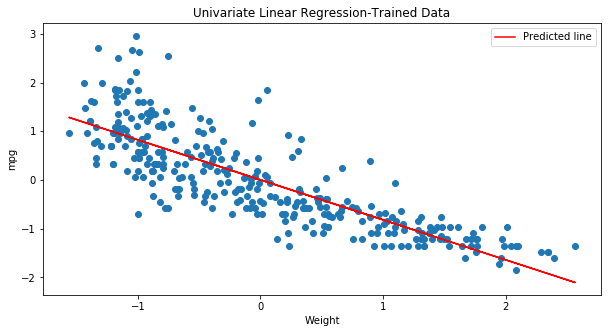

In [29]:
Y_pred_train=model.predict(X_train)
plt.figure(figsize=(10,5))
plt.scatter(X_train,Y_train)
plt.plot(X_train,Y_pred_train,color="red",label="Predicted line")
plt.xlabel("Weight")
plt.ylabel("mpg")
plt.title("Univariate Linear Regression-Trained Data")
plt.legend()





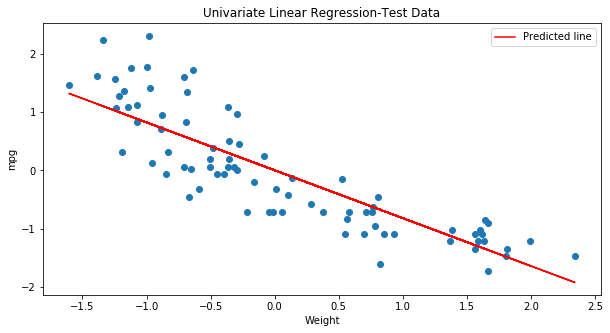

In [30]:
plt.figure(figsize=(10,5))
plt.scatter(X_test,Y_test)
plt.plot(X_test,Y_pred,color="red",label="Predicted line")
plt.xlabel("Weight")
plt.ylabel("mpg")
plt.title("Univariate Linear Regression-Test Data")
plt.legend()

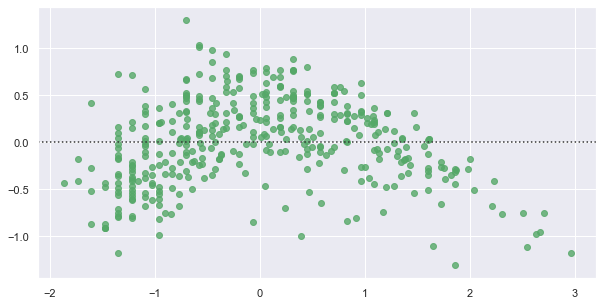

In [31]:
m=len(X)
X=X.reshape(m,1)
Y_pred_all=model.predict(X)
plt.figure(figsize=(10,5))
sns.set(style="darkgrid")
sns.residplot(Y,Y_pred_all,color="g")

###Multivariate Regression

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"]=(20.0,10.0)

In [33]:
df2[0:5]

array([[-0.7064387 ,  1.49819126,  1.0906037 ,  0.66919608,  0.63086987,
        -1.29549834, -1.62742629, -0.71514478],
       [-1.09075062,  1.49819126,  1.5035143 ,  1.58659918,  0.85433297,
        -1.47703779, -1.62742629, -0.71514478],
       [-0.7064387 ,  1.49819126,  1.19623199,  1.19342642,  0.55047045,
        -1.65857724, -1.62742629, -0.71514478],
       [-0.96264665,  1.49819126,  1.06179598,  1.19342642,  0.54692342,
        -1.29549834, -1.62742629, -0.71514478],
       [-0.83454267,  1.49819126,  1.04259084,  0.93131125,  0.56584093,
        -1.84011669, -1.62742629, -0.71514478]])

In [34]:
x=df2[:,4]
Y=df2[:,0]
m=len(x)
#a0=np.ones(m)
X=x.reshape(m,1)
#X=np.append(np.ones((398,1)).astype(int),values=x,axis=1)
b=np.array([0])
alpha=0.0001##Learning Rate
def cost_func(X,Y,b):
    l=len(Y)
    J=np.sum((X.dot(b)-Y)**2)/(2*l)
    return J
initial_cost=cost_func(X,Y,b)
print(initial_cost)


    


0.49999999999999983


In [35]:
def gradient_descent(X,Y,b,iterations):
    cost_history=[0]*iterations
    l=len(Y)
    for iteration in range(iterations):
        h=X.dot(b)
        loss=h-Y
        gradient=X.T.dot(loss)/l
        b=b-alpha*gradient
        cost=cost_func(X,Y,b)
        cost_history[iteration]=cost
    return cost_history,b

In [36]:
cost_history,newb=gradient_descent(X,Y,b,1000)
print("Final Reduced cost:\n",np.min(cost_history))
print("New Coefficients:\n",newb)

Final Reduced cost:
 0.4372967716060474
New Coefficients:
 [-0.07915438]


In [37]:
def rmse(Y,Y_pred):
    rmse=np.sqrt(sum((Y-Y_pred)**2)/len(Y))
    return rmse
def r2_score(Y,Y_pred):
    mean_y=np.mean(Y)
    ss_t=sum((Y-mean_y)**2)
    ss_r=sum((Y-Y_pred)**2)
    r2_score=1-(ss_r/ss_t)
    return r2_score



In [38]:
Y_pred=X.dot(newb)
print("RMSE:\n",rmse(Y,Y_pred))
print("R2_Score:\n",r2_score(Y,Y_pred))

RMSE:
 0.9351970611652358
R2_Score:
 0.12540645678790519


Text(0.5, 0.98, 'Best Fit Line using Gradient descent')

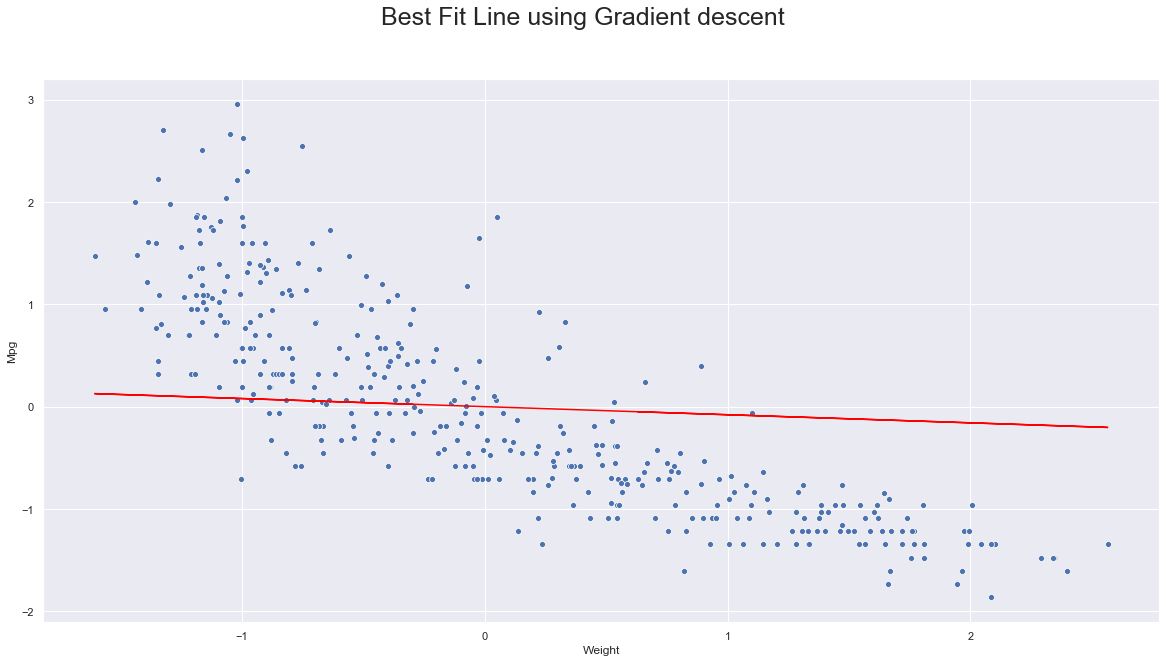

In [39]:
## By using Learning rate=0.0001 and iterations=1000,we got following predicted line
f=plt.figure(figsize=(20,10))
sns.scatterplot(x,Y)
plt.plot(x,Y_pred,color="red")
plt.xlabel("Weight")
plt.ylabel("Mpg")
f.suptitle("Best Fit Line using Gradient descent",size=25)

In [41]:
mean_x=np.mean(x)
mean_y=np.mean(Y)
l=len(x)
numer=0
denom=0
for i in range(l):
    numer+=(x[i]-mean_x)*(Y[i]-mean_y)
    denom+=(x[i]-mean_x)**2
m=numer/denom
c=mean_y-(m*mean_x)
print("coefficients are:\nSlope: Intercept:\n",m,c)

coefficients are:
Slope: Intercept:
 -0.8317409332443344 -6.222905427938174e-17


In [42]:
print("Line equation is:Y=",m,"X+",c)

Line equation is:Y= -0.8317409332443344 X+ -6.222905427938174e-17


In [43]:
##Modifying Learning rate and iteractions:-
#Increased the no.of iterations from 1000 to 100000

cost_history,newb=gradient_descent(X,Y,b,100000)
print("Final Reduced cost:\n",np.min(cost_history))
print("New Coefficients:\n",newb)

Final Reduced cost:
 0.1541035106951545
New Coefficients:
 [-0.83170319]


In [44]:
Y_pred=X.dot(newb)
print("RMSE:\n",rmse(Y,Y_pred))
print("R2_Score:\n",r2_score(Y,Y_pred))

RMSE:
 0.555163959015991
R2_Score:
 0.6917929786096908


Text(0.5, 0.98, 'Best Fit Line using Gradient descent')

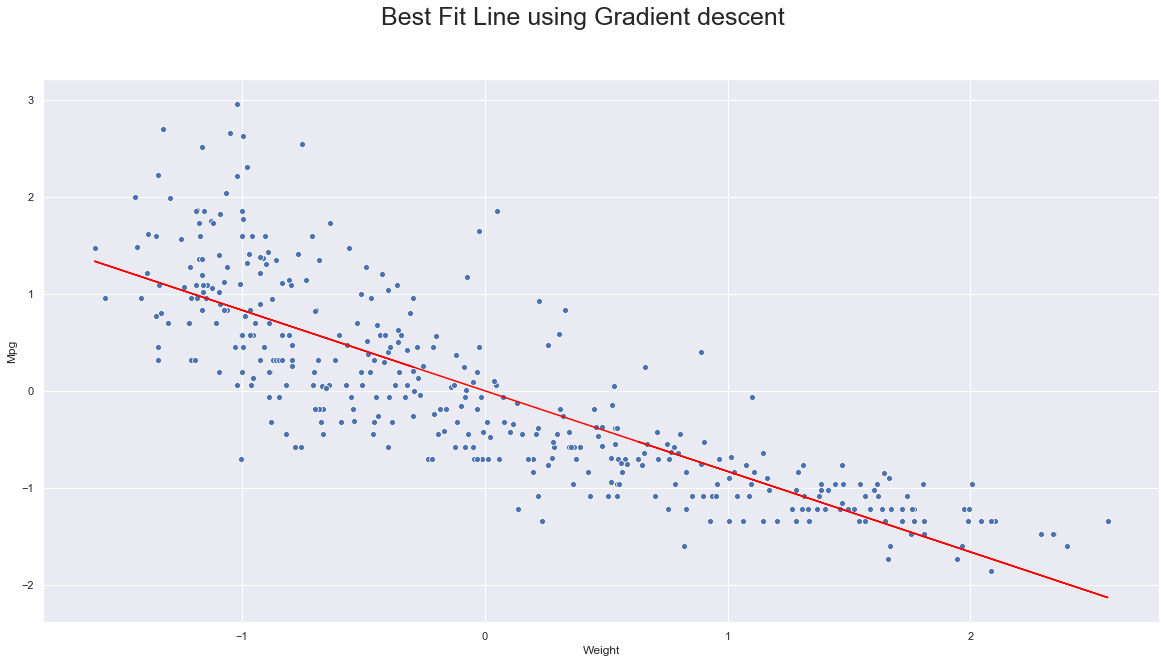

In [45]:
f=plt.figure(figsize=(20,10))
sns.scatterplot(x,Y)
plt.plot(x,Y_pred,color="red")
plt.xlabel("Weight")
plt.ylabel("Mpg")
f.suptitle("Best Fit Line using Gradient descent",size=25)

####KNN Assignments

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
url="http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data"
df=pd.read_csv(url,names=["Age of patient at time of operation (numerical)","Patient's year of operation (year - 1900, numerical)",
                         "Number of positive axillary nodes detected (numerical)","Survival status (class attribute)"])
df.head()

,Age of patient at time of operation (numerical),"Patient's year of operation (year - 1900, numerical)",Number of positive axillary nodes detected (numerical),Survival status (class attribute)
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
Age of patient at time of operation (numerical)           306 non-null int64
Patient's year of operation (year - 1900, numerical)      306 non-null int64
Number of positive axillary nodes detected (numerical)    306 non-null int64
Survival status (class attribute)                         306 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB


In [49]:
df.describe()

,Age of patient at time of operation (numerical),"Patient's year of operation (year - 1900, numerical)",Number of positive axillary nodes detected (numerical),Survival status (class attribute)
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


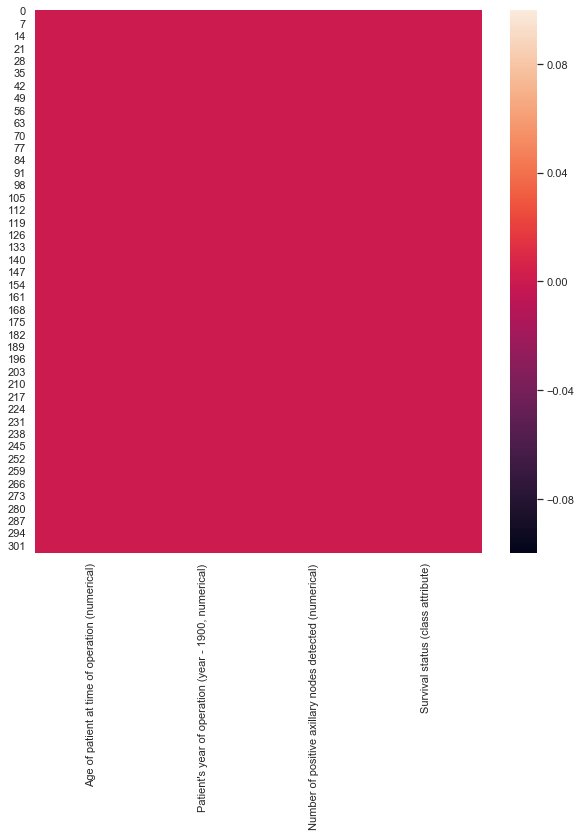

In [50]:
plt.figure(figsize=(10,10))
sns.heatmap(df.isnull())

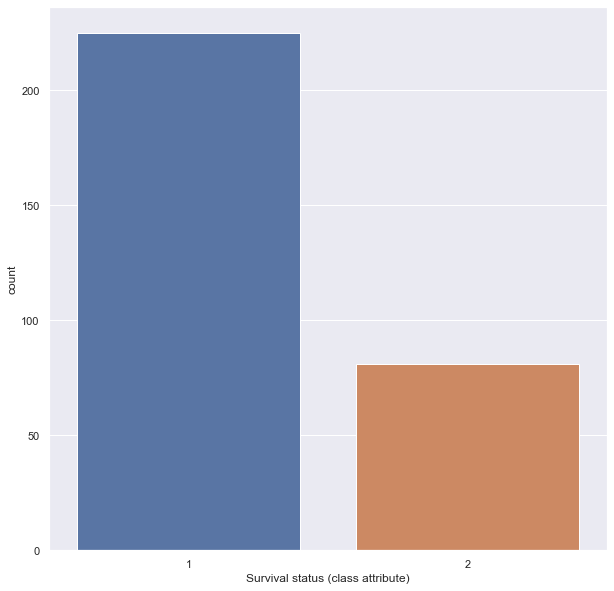

In [51]:
plt.figure(figsize=(10,10))
sns.countplot(df["Survival status (class attribute)"])

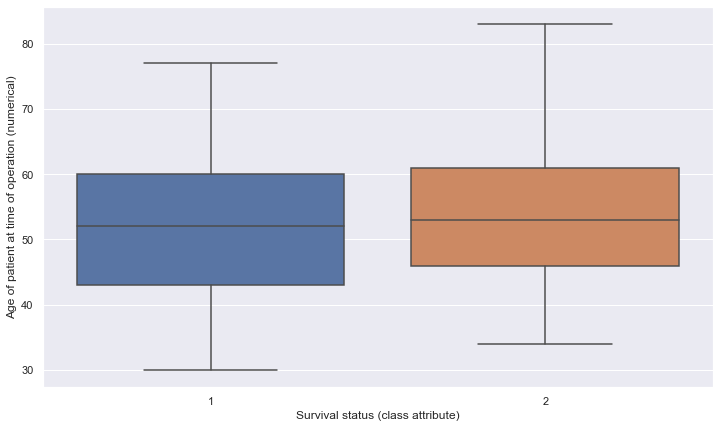

In [52]:
plt.figure(figsize=(12,7))
sns.boxplot(x="Survival status (class attribute)",y="Age of patient at time of operation (numerical)",data=df)

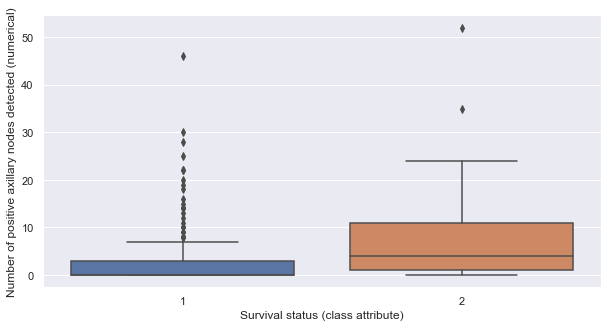

In [53]:
plt.figure(figsize=(10,5))
sns.boxplot(x="Survival status (class attribute)",y="Number of positive axillary nodes detected (numerical)",data=df)

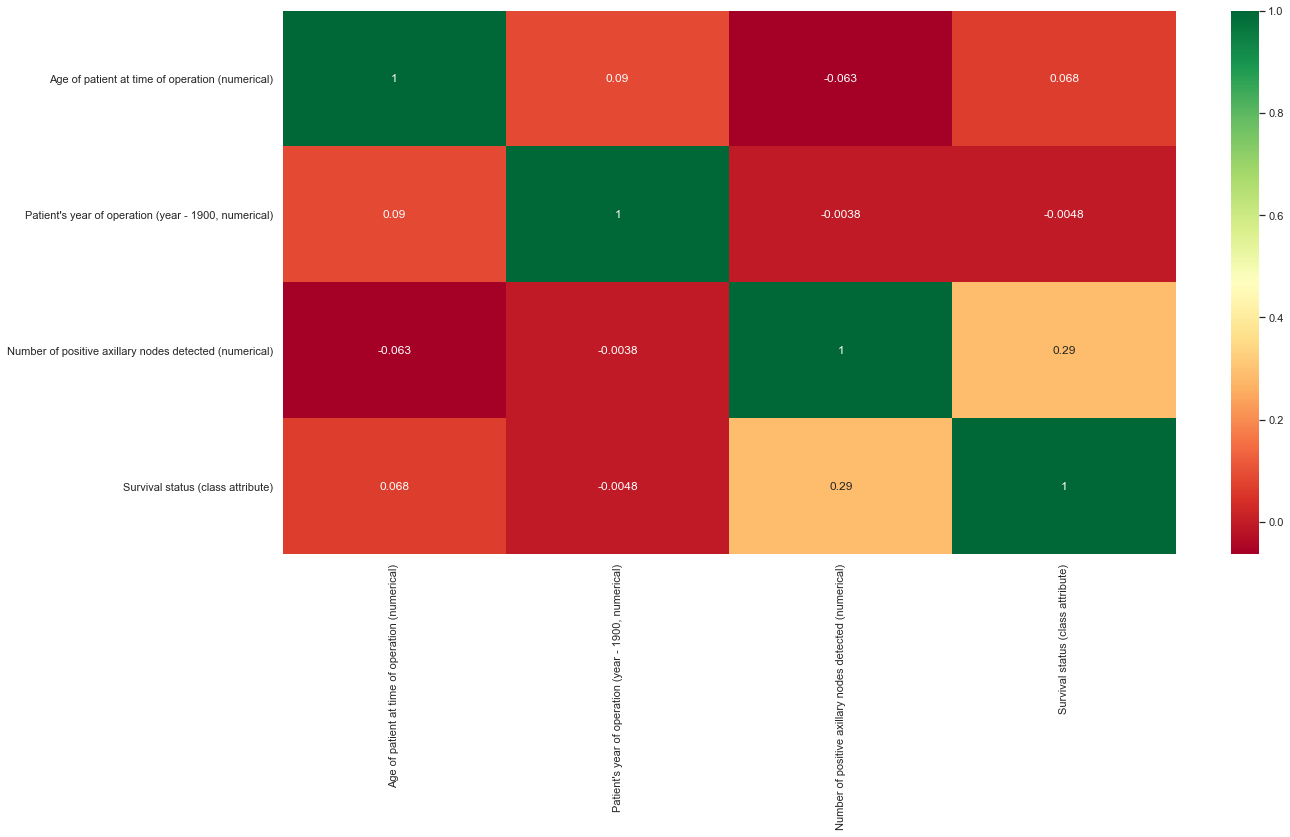

In [54]:
data=df.corr()
sns.heatmap(data,annot=True,cmap="RdYlGn")

In [55]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=df.iloc[:,:-1]
Y=df.iloc[:,3]
#df=sc.fit_transform(df)
X=sc.fit_transform(X)
X[0:5]

array([[-2.08214014,  0.35358406, -0.42159203],
       [-2.08214014, -0.26292148, -0.14295885],
       [-2.08214014,  0.66183684, -0.56090862],
       [-1.98942552, -1.18767981, -0.28227544],
       [-1.98942552,  0.66183684, -0.00364226]])

In [56]:
from sklearn.decomposition import PCA
pc=PCA(n_components=2)
principal_components=pc.fit_transform(X)
df1=pd.DataFrame(data=principal_components,columns=["Principal_component1","Principal_component2"])
df1=pd.concat([df1,Y],axis=1)
df1.head()

,Principal_component1,Principal_component2,Survival status (class attribute)
0,1.079952,-0.164819,1
1,1.552517,-0.292351,1
2,0.843669,-0.101052,1
3,1.963759,-0.937989,1
4,1.011230,0.355427,1


In [57]:
pc.explained_variance_ratio_

array([0.37045668, 0.33215125])

In [58]:
X=df1.iloc[:,:-1]
Y=df1.iloc[:,2]


In [59]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)
print("X_shapes:\nX_train:X_test\n",X_train.shape,X_test.shape,"\n")
print("Y_shapes:\nY_train:Y_test\n",Y_train.shape,Y_test.shape,"\n")

X_shapes:
X_train:X_test
 (244, 2) (62, 2) 

Y_shapes:
Y_train:Y_test
 (244,) (62,) 



In [60]:
from sklearn.neighbors import KNeighborsClassifier
training_accuracy=[]
test_accuracy=[]
neighbors=range(1,15)
for neighbor in neighbors:
    knn=KNeighborsClassifier(n_neighbors=neighbor)
    knn.fit(X_train,Y_train)
    training_accuracy.append(knn.score(X_train,Y_train))
    test_accuracy.append(knn.score(X_test,Y_test))
print("Training_accuracy:\n",training_accuracy)
print("\nTest_accuracy:\n",test_accuracy)

Training_accuracy:
 [0.9836065573770492, 0.8442622950819673, 0.860655737704918, 0.7991803278688525, 0.8237704918032787, 0.7909836065573771, 0.7827868852459017, 0.7868852459016393, 0.7622950819672131, 0.7622950819672131, 0.7622950819672131, 0.7663934426229508, 0.7786885245901639, 0.7745901639344263]

Test_accuracy:
 [0.532258064516129, 0.5967741935483871, 0.6290322580645161, 0.5806451612903226, 0.6129032258064516, 0.6290322580645161, 0.5967741935483871, 0.6290322580645161, 0.6290322580645161, 0.6451612903225806, 0.6612903225806451, 0.6290322580645161, 0.6129032258064516, 0.6290322580645161]


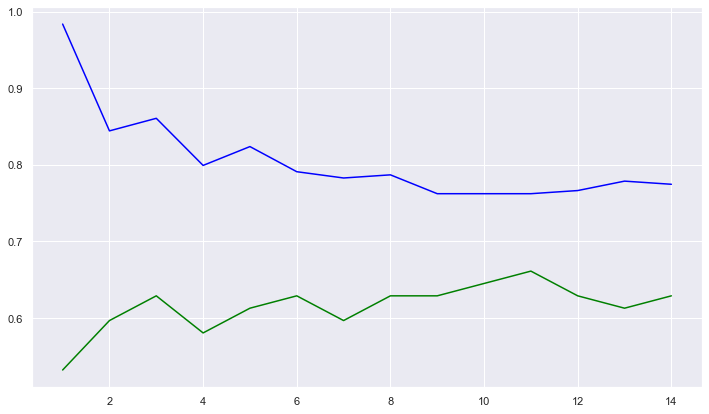

In [61]:
plt.figure(figsize=(12,7))
plt.plot(neighbors,training_accuracy,color="blue")
plt.plot(neighbors,test_accuracy,color="green")

In [62]:
knn=KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train,Y_train)
knn.score(X_test,Y_test)

0.6612903225806451

In [63]:
Y_pred=knn.predict(X_test)
Y_pred

array([1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [64]:
from sklearn.metrics import confusion_matrix,classification_report
print("Classification_report:\n",classification_report(Y_test,Y_pred))
print("Confusion_matrix:\n",confusion_matrix(Y_test,Y_pred))


Classification_report:
               precision    recall  f1-score   support

           1       0.64      0.97      0.77        37
           2       0.83      0.20      0.32        25

    accuracy                           0.66        62
   macro avg       0.74      0.59      0.55        62
weighted avg       0.72      0.66      0.59        62

Confusion_matrix:
 [[36  1]
 [20  5]]
